<a href="https://colab.research.google.com/github/fabioismerim/deep_learning/blob/main/DeepLearning_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from ast import increment_lineno
#import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import (roc_auc_score, roc_curve, auc)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer
from tensorflow.keras.optimizers import Adam


%matplotlib inline
plt.style.use('fivethirtyeight')

rcParams['figure.figsize'] = 11,8




In [2]:
#import dataset
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/Customer_Churn_Modelling.csv')


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#feautures and label
X = df.iloc[:, 3:-1]
y = df['Exited']

In [5]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


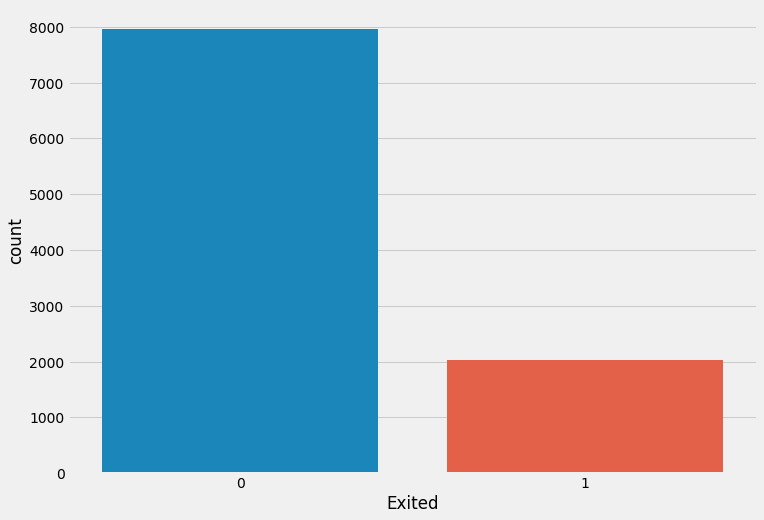

In [8]:
sns.countplot(x=y)
plt.show()

Unbalenced Data

## Pre-processing

In [9]:
#hot-encoding features
X_onehot = pd.get_dummies(X, drop_first=True)
X_onehot.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
#train-test split
X_train,X_test,y_train,y_test = train_test_split(X_onehot, y, test_size=0.2, stratify=y)

In [11]:
X_train.shape[1:]

(11,)

In [12]:
X_train.shape

(8000, 11)

In [13]:
#scaling data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Buiild ANN

In [14]:
model = Sequential()
model.add(InputLayer(input_shape = X_train.shape[1:]))#input layer (1st layer)
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy')

In [17]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
250/250 [==============================] - 3s 6ms/step - loss: 0.4199 - val_loss: 0.3704
Epoch 2/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3583 - val_loss: 0.3413
Epoch 3/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3463 - val_loss: 0.3385
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3414 - val_loss: 0.3374
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3377 - val_loss: 0.3365
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3334 - val_loss: 0.3403
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3302 - val_loss: 0.3382
Epoch 8/10
250/250 [==============================] - 1s 6ms/step - loss: 0.3266 - val_loss: 0.3377
Epoch 9/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3241 - val_loss: 0.3361
Epoch 10/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3204 - val_loss: 0.3319

In [18]:
#predict
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [19]:
y_pred

array([[0.34623298],
       [0.15734202],
       [0.04445258],
       ...,
       [0.08658504],
       [0.03007676],
       [0.07777116]], dtype=float32)

In [20]:
#cutoff at .5
y_pred = (y_pred>0.5).astype(int)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



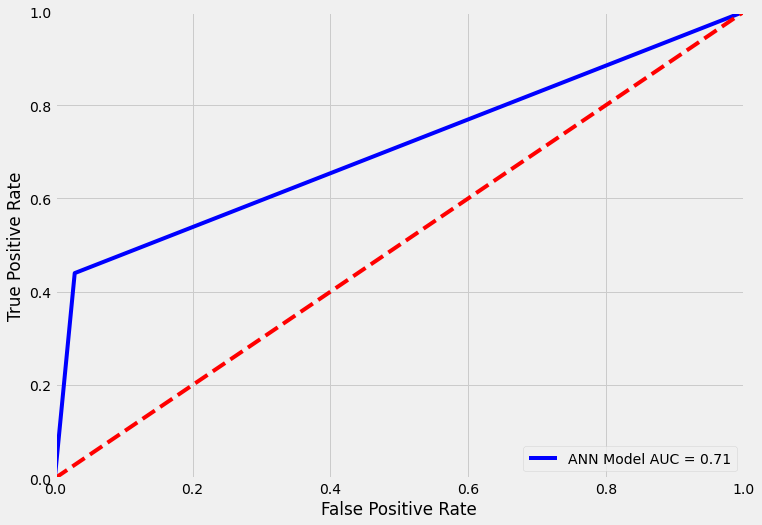

In [22]:
model_fpr, model_tpr, threshold = roc_curve(y_test, y_pred)
model_roc_auc = auc(model_fpr,model_tpr)

plt.plot(model_fpr, model_tpr, 
         'b',
         label = 'ANN Model AUC = %0.2f' % model_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()